## Artificial Neural Networks with Keras


First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Building an Image Classifier

First let's import TensorFlow and Keras

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.3.1'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [4]:
digits_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = digits_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [5]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [6]:
X_train_full.dtype

dtype('uint8')


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

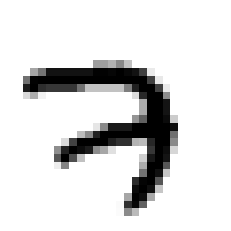

In [8]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [9]:
y_train


array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Here are the corresponding class names:

In [10]:
class_names = ["zéro", "un", "deux", "trois", "quatre",
               "cinq", "Six", "Sept", "huit", "neuf"]


So the first image in the training set is a coat:

In [11]:
class_names[y_train[0]]

'Sept'


The validation set contains 5,000 images, and the test set contains 10,000 images:

In [12]:
X_valid.shape

(5000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

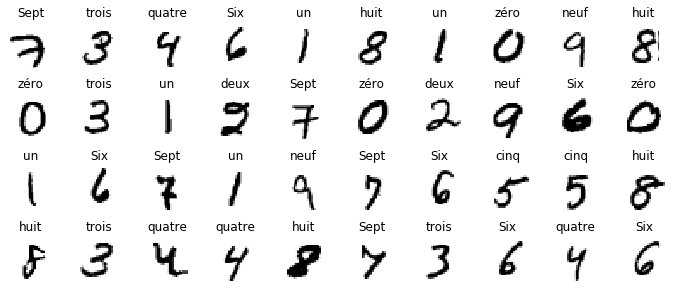

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

### model 1 (optimizer ADAM)

In [15]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28, 28]))
model1.add(keras.layers.Dense(300, activation="relu"))
model1.add(keras.layers.Dense(100, activation="relu"))
model1.add(keras.layers.Dense(10, activation="softmax"))

### model 2 (optimizer stochastic gradient descent)

In [16]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28, 28]))
model2.add(keras.layers.Dense(300, activation="relu"))
model2.add(keras.layers.Dense(100, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

###  model 3 (optimizer RMSpop)

In [17]:
model3= keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[28, 28]))
model3.add(keras.layers.Dense(300, activation="relu"))
model3.add(keras.layers.Dense(100, activation="relu"))
model3.add(keras.layers.Dense(10, activation="softmax"))

## Model 4 avec plus de couches (layers) 

In [18]:
model4 = keras.models.Sequential()
model4.add(keras.layers.Flatten(input_shape=[28, 28]))
model4.add(keras.layers.Dense(300, activation="relu"))
model4.add(keras.layers.Dense(300, activation="relu"))
model4.add(keras.layers.Dense(100, activation="relu"))
model4.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
#keras.backend.clear_session()
np.random.seed(42)

or using the folowing method

In [20]:
#model = keras.models.Sequential([
#    keras.layers.Flatten(input_shape=[28, 28]),
#    keras.layers.Dense(300, activation="relu"),
#    keras.layers.Dense(100, activation="relu"),
 #   keras.layers.Dense(10, activation="softmax")
#])

In [21]:
model1.layers
model2.layers
model3.layers

In [22]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
____________________________

In [23]:
hidden1_model1 = model1.layers[1]
hidden1_model2 = model2.layers[1]
hidden1_model3 = model3.layers[1]

#hidden1.name

In [24]:
hidden1_model4 = model4.layers[1]

In [25]:
#model.get_layer(hidden1.name) is hidden1

In [26]:
weights1, biases1 = hidden1_model1.get_weights()
weights2, biases2 = hidden1_model2.get_weights()
weights3, biases3 = hidden1_model3.get_weights()


In [27]:
weights4, biases4 = hidden1_model4.get_weights()

In [28]:
weights1
weights2
weights3



array([[-0.01674879, -0.02868662, -0.00038206, ..., -0.04018766,
        -0.06604797,  0.0038299 ],
       [ 0.03526174,  0.03079321, -0.00040033, ...,  0.00533298,
        -0.05704462,  0.04388308],
       [-0.02316871,  0.0595455 ,  0.03156346, ..., -0.06919226,
         0.05181351,  0.0540944 ],
       ...,
       [-0.00452622, -0.0317004 ,  0.0084636 , ...,  0.04774337,
         0.00499874, -0.05765729],
       [ 0.01855864, -0.02074662,  0.00226238, ...,  0.00110906,
         0.02596242,  0.07078271],
       [-0.07064608,  0.05294372,  0.04101006, ...,  0.03896308,
         0.03557915,  0.05426408]], dtype=float32)

In [29]:
weights4

array([[-0.0353255 ,  0.0465942 ,  0.00821862, ..., -0.01471258,
         0.07165918, -0.06694864],
       [-0.06875318,  0.06889093, -0.0091166 , ...,  0.05952078,
        -0.02018782, -0.05272029],
       [-0.05802792, -0.04071699,  0.06180595, ..., -0.05641326,
         0.02113868,  0.00837674],
       ...,
       [ 0.04135116,  0.01011708,  0.02524745, ..., -0.04243189,
         0.02910008, -0.07015689],
       [-0.02586035, -0.00641138, -0.0388787 , ...,  0.04837304,
        -0.05272171,  0.03404637],
       [ 0.05847476, -0.05402067,  0.00851222, ..., -0.02021856,
        -0.04332919,  0.0566061 ]], dtype=float32)

In [30]:
weights1.shape
weights2.shape
weights3.shape


(784, 300)

In [31]:
weights4.shape

(784, 300)

In [32]:
biases2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases1.shape

(300,)

## Compile the Model

Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [34]:
# with optimizer ADAM
model1.compile(loss="sparse_categorical_crossentropy",
            optimizer="Adam",
           metrics=["accuracy"])

In [35]:
#with optimizer stochastic gradient descent
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [36]:
#with optimizer RMSprop
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [37]:
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

#This is equivalent to:

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

## Train the model

Here you can chose how many epochs you need and the batch size.

#### training model1

In [38]:
history1 = model1.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 6s 5ms/step - loss: 0.2311 - accuracy: 0.9321 - val_loss: 0.1137 - val_accuracy: 0.9664
Epoch 2/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.0876 - accuracy: 0.9731 - val_loss: 0.0840 - val_accuracy: 0.9710
Epoch 3/50
1100/1100 [==============================] - 5s 4ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.0787 - val_accuracy: 0.9766
Epoch 4/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0606 - val_accuracy: 0.9820
Epoch 5/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.0775 - val_accuracy: 0.9784
Epoch 6/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.0715 - val_accuracy: 0.9814
Epoch 7/50
1100/1100 [==============================] - 5s 5ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0705 - val_accuracy:

#### training model 2(optimizer SGD)

In [39]:
history2 = model2.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.7551 - accuracy: 0.8024 - val_loss: 0.3673 - val_accuracy: 0.9020
Epoch 2/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.3372 - accuracy: 0.9042 - val_loss: 0.2823 - val_accuracy: 0.9222
Epoch 3/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2793 - accuracy: 0.9206 - val_loss: 0.2431 - val_accuracy: 0.9308
Epoch 4/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2454 - accuracy: 0.9304 - val_loss: 0.2175 - val_accuracy: 0.9372
Epoch 5/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.2196 - accuracy: 0.9384 - val_loss: 0.1965 - val_accuracy: 0.9438
Epoch 6/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.1989 - accuracy: 0.9437 - val_loss: 0.1799 - val_accuracy: 0.9516
Epoch 7/50
1100/1100 [==============================] - 4s 4ms/step - loss: 0.1820 - accuracy: 0.9483 - val_loss: 0.1699 - val_accuracy:

#### trainingmodel 3 (optimizer RMSpop)

In [40]:
history3 = model3.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 7s 6ms/step - loss: 0.2230 - accuracy: 0.9339 - val_loss: 0.1089 - val_accuracy: 0.9670
Epoch 2/50
1100/1100 [==============================] - 6s 6ms/step - loss: 0.0954 - accuracy: 0.9714 - val_loss: 0.0893 - val_accuracy: 0.9750
Epoch 3/50
1100/1100 [==============================] - 6s 5ms/step - loss: 0.0677 - accuracy: 0.9801 - val_loss: 0.0871 - val_accuracy: 0.9770
Epoch 4/50
1100/1100 [==============================] - 6s 5ms/step - loss: 0.0502 - accuracy: 0.9849 - val_loss: 0.0947 - val_accuracy: 0.9742
Epoch 5/50
1100/1100 [==============================] - 6s 5ms/step - loss: 0.0392 - accuracy: 0.9888 - val_loss: 0.0794 - val_accuracy: 0.9798
Epoch 6/50
1100/1100 [==============================] - 6s 5ms/step - loss: 0.0301 - accuracy: 0.9908 - val_loss: 0.0839 - val_accuracy: 0.9812
Epoch 7/50
1100/1100 [==============================] - 6s 5ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0829 - val_accuracy:

si on augmente  batch size  le nbre d étapes dans chaque epochs diminue telle que on a remarqué que pour batch siz=30 on a 1717 steps et ensuite on augmente batch size=50 on obtient 1100 steps, si on change le nbre d'epochs le nbre de steps dans chaque iteration reste le meme ( 1100 dans le batch size=50)

### training model4 (avec des couches cachées supp)

In [41]:
history4 = model4.fit(X_train, y_train, batch_size=50, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1100/1100 [==============================] - 7s 6ms/step - loss: 0.2198 - accuracy: 0.9344 - val_loss: 0.1005 - val_accuracy: 0.9696
Epoch 2/50
1100/1100 [==============================] - 7s 6ms/step - loss: 0.0886 - accuracy: 0.9723 - val_loss: 0.0924 - val_accuracy: 0.9742
Epoch 3/50
1100/1100 [==============================] - 6s 6ms/step - loss: 0.0622 - accuracy: 0.9809 - val_loss: 0.0757 - val_accuracy: 0.9774
Epoch 4/50
1100/1100 [==============================] - 6s 6ms/step - loss: 0.0457 - accuracy: 0.9857 - val_loss: 0.0876 - val_accuracy: 0.9780
Epoch 5/50
1100/1100 [==============================] - 6s 5ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0838 - val_accuracy: 0.9776
Epoch 6/50
1100/1100 [==============================] - 6s 6ms/step - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0754 - val_accuracy: 0.9818
Epoch 7/50
1100/1100 [==============================] - 7s 6ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0866 - val_accuracy:

In [42]:
history1.params

{'verbose': 1, 'epochs': 50, 'steps': 1100}

In [43]:
history2.params

{'verbose': 1, 'epochs': 50, 'steps': 1100}

In [44]:
history3.params

{'verbose': 1, 'epochs': 50, 'steps': 1100}

In [45]:
print(history1.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [46]:
print(history2.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [47]:
print(history3.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [48]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [49]:
history2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [50]:
history3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
history4.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plot learning Curves

### optimizer ADAM

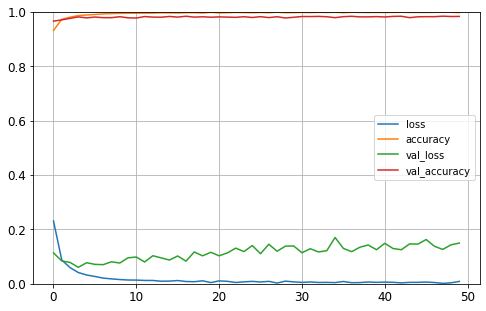

In [52]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### optimizer SGD

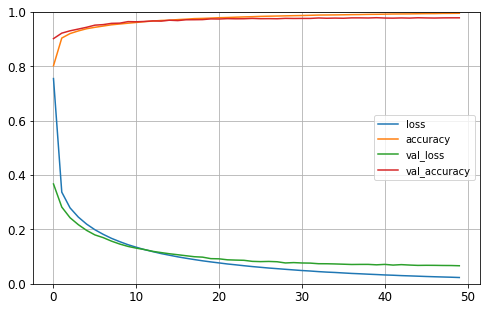

In [53]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

###  optimizer RMSpop

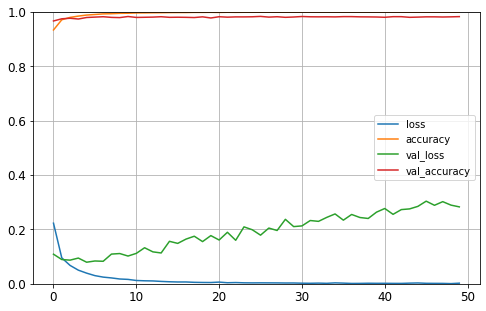

In [54]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Model 4 : plus de couches

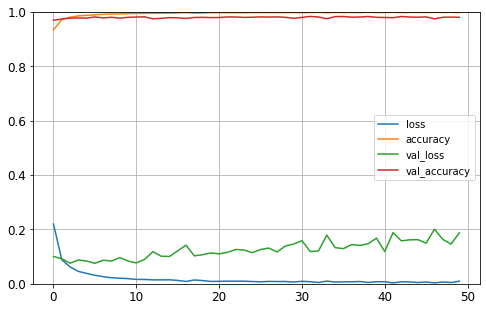

In [55]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### l'application sur les données de test

#### model1

In [56]:
predict_test1=model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9806


#### model2

In [57]:
predict_test2=model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0717 - accuracy: 0.9788


#### model3

In [58]:
predict_test3=model3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.9808


### model 4

In [59]:
predict_test4=model4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2099 - accuracy: 0.9779


In [60]:
X_new = X_test[:3]


In [61]:
y_proba = model1.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [62]:
y_proba = model2.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [63]:
y_proba = model3.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_proba = model4.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [65]:
y_pred1 = model1.predict_classes(X_new)
y_pred1

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1], dtype=int64)

In [66]:
y_pred2 = model2.predict_classes(X_new)
y_pred2

array([7, 2, 1], dtype=int64)

In [67]:
y_pred3 = model3.predict_classes(X_new)
y_pred3

array([7, 2, 1], dtype=int64)

In [68]:
y_pred4 = model4.predict_classes(X_new)
y_pred4

array([7, 2, 1], dtype=int64)

In [69]:
np.array(class_names)[y_pred1]

array(['Sept', 'deux', 'un'], dtype='<U6')

In [70]:
np.array(class_names)[y_pred2]

array(['Sept', 'deux', 'un'], dtype='<U6')

In [71]:
np.array(class_names)[y_pred3]

array(['Sept', 'deux', 'un'], dtype='<U6')

In [72]:
np.array(class_names)[y_pred4]

array(['Sept', 'deux', 'un'], dtype='<U6')

In [73]:

y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

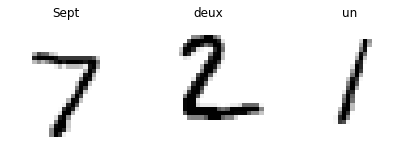

In [74]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Comparaison entre les 3 optimizers

In [75]:
comp=[]
comp.append(predict_test1[1])
comp.append(predict_test2[1])
comp.append(predict_test3[1])
comp.append(predict_test4[1])

In [76]:
comp

[0.9805999994277954,
 0.9787999987602234,
 0.9807999730110168,
 0.9779000282287598]

on remarque que la performance  des optimizers depend au dataset et aussi on peut pas dire que l'ajout des couches dans notre réseaux améliore les résultats d'accuaracy car tjrs ca depend au dataset .